### Bayesian Data Analysis, 3rd ed
## Chapter 2, demo 4

Authors:
- Aki Vehtari <aki.vehtari@aalto.fi>
- Tuomas Sivula <tuomas.sivula@aalto.fi>

Probability of a girl birth given placenta previa (BDA3 p. 37).
Calculate the posterior distribution on a discrete grid of points by multiplying the likelihood and a non-conjugate prior at each point, and normalizing over the points. Simulate samples from the resulting non-standard posterior distribution using inverse cdf using the discrete grid.

In [1]:
# Import necessary packages

import numpy as np
from scipy.stats import beta

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)

#### Calculate results

In [4]:
# data (437,543)
a = 437
b = 543

# grid of nx points
nx = 1000
x = np.linspace(0, 1, nx)

# compute density of non-conjugate prior in grid
# this non-conjugate prior is same as in Figure 2.4 in the book
pp = np.ones(nx)
ascent = (0.385 <= x) & (x <= 0.485)
descent = (0.485 <= x) & (x <= 0.585)
pm = 11
pp[ascent] = np.linspace(1, pm, np.count_nonzero(ascent))
pp[descent] = np.linspace(pm, 1, np.count_nonzero(descent))
# normalize the prior
pp /= np.sum(pp)

# unnormalised non-conjugate posterior in grid
po = beta.pdf(x, a, b)*pp
po /= np.sum(po)
# cumulative
pc = np.cumsum(po)

# inverse-cdf sampling
# get n uniform random numbers from [0,1]
n = 10000
r = np.random.rand(n)
# map each r into corresponding grid point x:
# [0, pc[0]) map into x[0] and [pc[i-1], pc[i]), i>0, map into x[i]
rr = x[np.sum(pc[:,np.newaxis] < r, axis=0)]

#### Plot results

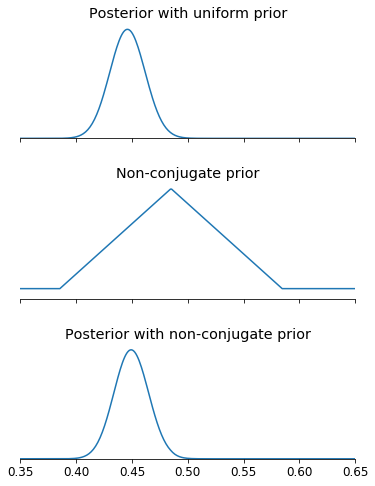

In [5]:
# plot 3 subplots
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 8))
fig.subplots_adjust(hspace=0.4)
# posterior with uniform prior Beta(1,1)
axes[0].plot(x, beta.pdf(x, a+1, b+1))
axes[0].set_title('Posterior with uniform prior')
# non-conjugate prior
axes[1].plot(x, pp)
axes[1].set_title('Non-conjugate prior')
# posterior with non-conjugate prior
axes[2].plot(x, po)
axes[2].set_title('Posterior with non-conjugate prior')

# cosmetics
for ax in axes:
    ax.set_yticks(())
    ax.set_ylim((0, ax.get_ylim()[1]))
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
# set custom x-limits
axes[0].set_xlim((0.35, 0.65));


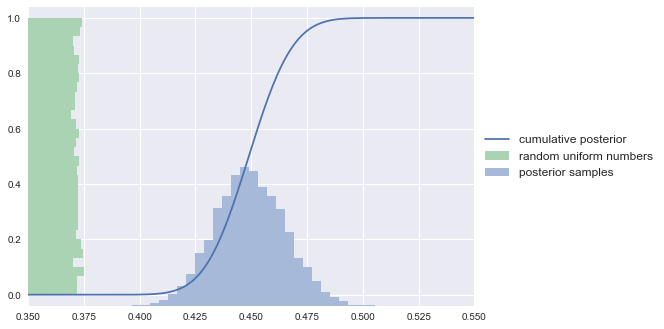

In [6]:
# plot samples
plt.style.use('seaborn')
# calculate histograms and scale them into the same figure
hist_r = np.histogram(r, bins=30)
hist_rr = np.histogram(rr, bins=30)
plt.barh(
    hist_r[1][:-1],
    hist_r[0]*0.025/hist_r[0].max(),
    height=hist_r[1][1]-hist_r[1][0],
    left=0.35,
    align='edge',
    color=plot_tools.lighten('C1'),
    label='random uniform numbers'
)
plt.bar(
    hist_rr[1][:-1],
    hist_rr[0]*0.5/hist_rr[0].max(),
    width=hist_rr[1][1]-hist_rr[1][0],
    bottom=-0.04,
    align='edge',
    color=plot_tools.lighten('C0'),
    label='posterior samples'
)
# plot cumulative posterior
plt.plot(
    x,
    pc,
    color='C0',
    label='cumulative posterior'
)
# turn spines off

# legend
plt.legend(
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    fontsize=12
)
# set limits
plt.xlim((0.35, 0.55))
plt.ylim((-0.04, 1.04));